# Used Car Price Prediction

In the course of this project, I analyzed a dataset comprising used cars sourced from eBay Kleinanzeigen, the classifieds section of the German eBay platform.The dataset was uploaded to data.world by the user orgeleka. For reference and further exploration, the dataset is accessible [here](https://data.world/data-society/used-cars-data)

<figure style="text-align: center;">
  <img src="cars.jpg" style="width:400px;height:300px; margin: auto;">
</figure>

Below are essential details from the dataset:
- `dateCrawled` - Timestamp indicating the initial web crawl of the advertisement. All field values are extracted from this particular date.
- `name` - Title of the vehicle.
- `seller` - Specifies whether the seller is an individual or a dealership.
- `offerType` - The categorization of the listing.
- `Price` - The advertised selling price of the vehicle.
- `abtest` - Indicates whether the listing is part of an A/B test.
- `vehicleType` - The category or type of the vehicle.
- `yearOfRegistration` - The year when the vehicle was originally registered.
- `gearbox` - The kind of transmission used by the vehicle.
- `powerPS` - The power of the vehicle measured in PS (horsepower).
- `model` - The specific model name of the car.
- `kilometer` - The total distance, in kilometers, the car has traveled.
- `monthOfRegistration` - The month in which the vehicle was initially registered.
- `fuelType` - The type of fuel system employed by the car.
- `brand` - The manufacturing brand of the vehicle.
- `notRepairedDamage` - Indicates whether the car has unrepaired damages.
- `dateCreated` - The date on which the eBay listing was initially created.
- `nrOfPictures` - The number of images included in the advertisement.
- `postalCode` - The postal code corresponding to the vehicle's location.
- `lastSeen` - Timestamp indicating the most recent online appearance of the advertisement by the web crawler.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib
from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import os
from tqdm import tqdm
import xgboost
pd.set_option("display.max_columns",None)
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
df = pd.read_csv("car_data.csv", encoding = 'UTF-8')

In [3]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,Lattitude,Longitude,lastSeen
0,19-03-2016 16:52,Volkswagen_Golf_1.4_Special,privat,Angebot,2600,test,limousine,2003,manuell,75,golf,150000,4,benzin,volkswagen,nein,19-03-2016 00:00,0,52224,50.76670,6.23333,19-03-2016 16:52
1,18-03-2016 14:38,Volkswagen_Golf_1.4_Special_TÜV_Klimaautomatik_VW,privat,Angebot,2300,test,limousine,2003,manuell,75,golf,150000,4,benzin,volkswagen,nein,18-03-2016 00:00,0,48369,52.17520,7.63132,21-03-2016 07:16
2,21-03-2016 18:58,Volkswagen_Golf_1.4_Ocean,privat,Angebot,2750,test,limousine,2003,manuell,75,golf,150000,9,benzin,volkswagen,nein,21-03-2016 00:00,0,58730,51.47450,7.76699,06-04-2016 21:16
3,23-03-2016 23:52,"Volkswagen_Golf_1.4_Ocean_Klima""2.Hand""VW_Sche...",privat,Angebot,2850,control,limousine,2003,manuell,75,golf,150000,10,benzin,volkswagen,nein,23-03-2016 00:00,0,47137,51.43511,6.76301,06-04-2016 19:15
4,05-04-2016 10:49,Volkswagen_Golf_1.4_Ocean,privat,Angebot,2700,control,limousine,2003,manuell,75,golf,150000,8,benzin,volkswagen,nein,05-04-2016 00:00,0,15754,52.28128,13.79809,07-04-2016 14:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371399,21-03-2016 18:46,Ford_Fiesta_1.25,privat,Angebot,4499,test,kleinwagen,2009,manuell,60,fiesta,50000,11,benzin,ford,nein,21-03-2016 00:00,0,10553,52.52468,13.40535,06-04-2016 20:19
371400,17-03-2016 18:53,Ford_Fiesta_Tuev_bis_2017,privat,Angebot,600,control,kleinwagen,2001,manuell,60,fiesta,125000,0,benzin,ford,nein,17-03-2016 00:00,0,26532,53.59320,7.36323,20-03-2016 21:18
371401,21-03-2016 13:57,Ford_Fiesta_1.3_Ambiente__Klima__Tuev_2017__Al...,privat,Angebot,3499,test,kleinwagen,2006,manuell,60,fiesta,100000,10,benzin,ford,nein,21-03-2016 00:00,0,52428,50.93330,6.36667,28-03-2016 09:46
371402,01-04-2016 12:53,Ford_Fiesta_1.25,privat,Angebot,6100,test,kleinwagen,2009,manuell,60,fiesta,40000,4,benzin,ford,nein,01-04-2016 00:00,0,78224,47.76670,8.83333,01-04-2016 12:53


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371404 entries, 0 to 371403
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371404 non-null  object 
 1   name                 371389 non-null  object 
 2   seller               371404 non-null  object 
 3   offerType            371404 non-null  object 
 4   price                371404 non-null  int64  
 5   abtest               371404 non-null  object 
 6   vehicleType          333550 non-null  object 
 7   yearOfRegistration   371404 non-null  int64  
 8   gearbox              351202 non-null  object 
 9   powerPS              371404 non-null  int64  
 10  model                350929 non-null  object 
 11  kilometer            371404 non-null  int64  
 12  monthOfRegistration  371404 non-null  int64  
 13  fuelType             338027 non-null  object 
 14  brand                371404 non-null  object 
 15  notRepairedDamage

In [5]:
df['dateCrawled'] = pd.to_datetime(df['lastSeen'], format='%d-%m-%Y %H:%M')

In [6]:
df['lastSeen'] = pd.to_datetime(df['lastSeen'], format='%d-%m-%Y %H:%M')

In [7]:
#finding duplicated rows
df.duplicated().sum() #duplicated rows are present

286

In [8]:
df = df.drop_duplicates() #dropping duplicated rows

In [9]:
#columns that have all zero values.
df.columns[df.isnull().all(axis=0)] 

Index([], dtype='object')

In [10]:
#rows that have all null values.
df[df.isnull().all(axis=1)] 

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,Lattitude,Longitude,lastSeen


In [11]:
#rows that have all zero values
df[df.eq(0).all(axis=1)] 

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,Lattitude,Longitude,lastSeen


## changing values from german to english

In [12]:
df["seller"].unique()

array(['privat', 'gewerblich'], dtype=object)

- 'privat' - private
- 'gewerblich'- commercial

In [13]:
df["offerType"].unique()

array(['Angebot', 'Gesuch'], dtype=object)

- 'Angebot' - offered
- 'Gesuch' - wanted

In [14]:
df["vehicleType"].unique()

array(['limousine', 'kleinwagen', 'cabrio', nan, 'kombi', 'coupe',
       'andere', 'bus', 'suv'], dtype=object)

- 'kleinwagen' - compact car
- 'cabrio' - convertible
- 'kombi' - station wagon
- 'andere' - other

In [15]:
df["gearbox"].unique()

array(['manuell', 'automatik', nan], dtype=object)

- "manuell" - Manual
- "automatik" - automatic

In [16]:
df["fuelType"].unique()

array(['benzin', 'diesel', nan, 'lpg', 'hybrid', 'andere', 'elektro',
       'cng'], dtype=object)

- 'benzin' - petrol
- 'andere' - other
- 'elektro' - electric

In [17]:
df["notRepairedDamage"].unique()

array(['nein', nan, 'ja'], dtype=object)

- "nein" - No
- "ja" - yes

In [18]:
def German_to_English(df):
    df["seller"] = df["seller"].replace({"privat":"private","gewerblich":"commercial"})
    df["offerType"] = df["offerType"].replace({"Angebot":"offered","Gesuch":"wanted"})
    df["vehicleType"] = df["vehicleType"].replace({"kleinwagen":"compact car","cabrio":"convertible","kombi":"station wagon","andere":"other"})
    df["gearbox"] = df["gearbox"].replace({"manuell":"Manual","automatik":"automatic"})
    df["fuelType"] = df["fuelType"].replace({"benzin":"petrol","andere":"other","elektro":"electric"})
    df["notRepairedDamage"] = df["notRepairedDamage"].replace({"nein":"No","ja":"yes"})

    return df

In [19]:
df = German_to_English(df)

In [21]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'Lattitude', 'Longitude', 'lastSeen'],
      dtype='object')

Let's select only those columns that are important for the model.

In [22]:
df = df.drop(['offerType','dateCrawled', 'name',"abtest","monthOfRegistration","dateCreated","nrOfPictures",\
              "postalCode","Lattitude",'Longitude', 'lastSeen'],axis=1)

In [24]:
df.isnull().sum()

seller                    0
price                     0
vehicleType           37833
yearOfRegistration        0
gearbox               20196
powerPS                   0
model                 20466
kilometer                 0
fuelType              33361
brand                     0
notRepairedDamage     71981
dtype: int64

# Data Cleaning

There are numerous null values, so instead of dropping the rows, let's impute them by filling in the missing values with the mode values corresponding to their respective car models.

In [25]:
def custom_mode(series):
    mode_values = series.mode()
    return mode_values.iloc[0] if not mode_values.empty else None

def impute_categorical_columns(df, columns, default_value=None):
    for column in columns:
        mode_val = df.groupby("model")[column].transform(custom_mode)
        df[column] = df[column].fillna(mode_val)

    df.dropna(subset=columns, inplace=True)

    return df

columns_to_impute = ['vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage']
df = impute_categorical_columns(df, columns_to_impute, default_value='Unknown')

In [26]:
df.isnull().sum()

seller                0
price                 0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
dtype: int64

In [27]:
df["seller"].value_counts()

seller
private       350647
commercial         3
Name: count, dtype: int64

As there is only one commercial seller value in this column, it is not useful for our analysis. Therefore, let's drop it.

In [28]:
df = df.drop("seller",axis=1)

In [29]:
df["yearOfRegistration"].unique()

array([2003, 2001, 1999, 1995, 1998, 2004, 2006, 1994, 2000, 2005, 1997,
       1996, 1988, 1993, 2002, 1989, 1992, 1991, 2007, 1984, 1987, 2009,
       1985, 1990, 1986, 1983, 1970, 2016, 2008, 1975, 1982, 1960, 1981,
       1974, 2012, 2010, 1910, 1980, 1979, 2011, 1978, 2015, 1977, 1969,
       2013, 1966, 1967, 1976, 1963, 1971, 1956, 1962, 1945, 1972, 1973,
       1958, 1965, 1964, 1968, 1953, 1951, 1943, 1928, 1929, 1930, 1959,
       1919, 2014, 1950, 1932, 1600, 1961, 1957, 1955, 1954, 1200, 1931,
       8984, 1927, 1941, 1942, 1934, 1947, 3984, 5895, 4984, 1000, 2984,
       8184, 1800, 1500, 1936, 1935, 1933, 1937, 7084, 9983, 6984, 7484,
       2184, 1952, 7984, 5539, 5884, 8484, 4484, 1602, 1001, 2274, 2484,
       1300, 1234, 3684, 1111, 2050, 6484, 6184, 1949, 2884, 1400, 1939,
       1938, 7784, 5984, 1948, 1923], dtype=int64)

As we can see, there are multiple incorrect year values; let's remove the rows containing those errors.

In [30]:
df = df[(df["yearOfRegistration"]>=1900) & (df["yearOfRegistration"]<=2016)]

In [31]:
df

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,2600,limousine,2003,Manual,75,golf,150000,petrol,volkswagen,No
1,2300,limousine,2003,Manual,75,golf,150000,petrol,volkswagen,No
2,2750,limousine,2003,Manual,75,golf,150000,petrol,volkswagen,No
3,2850,limousine,2003,Manual,75,golf,150000,petrol,volkswagen,No
4,2700,limousine,2003,Manual,75,golf,150000,petrol,volkswagen,No
...,...,...,...,...,...,...,...,...,...,...
371399,4499,compact car,2009,Manual,60,fiesta,50000,petrol,ford,No
371400,600,compact car,2001,Manual,60,fiesta,125000,petrol,ford,No
371401,3499,compact car,2006,Manual,60,fiesta,100000,petrol,ford,No
371402,6100,compact car,2009,Manual,60,fiesta,40000,petrol,ford,No


Let's remove the 'yearOfRegistration' column and replace it with a more informative 'age' column.

In [32]:
df["Age"] = 2016 - df["yearOfRegistration"]

In [33]:
df = df.drop("yearOfRegistration",axis=1)

In [34]:
df

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,2600,limousine,Manual,75,golf,150000,petrol,volkswagen,No,13
1,2300,limousine,Manual,75,golf,150000,petrol,volkswagen,No,13
2,2750,limousine,Manual,75,golf,150000,petrol,volkswagen,No,13
3,2850,limousine,Manual,75,golf,150000,petrol,volkswagen,No,13
4,2700,limousine,Manual,75,golf,150000,petrol,volkswagen,No,13
...,...,...,...,...,...,...,...,...,...,...
371399,4499,compact car,Manual,60,fiesta,50000,petrol,ford,No,7
371400,600,compact car,Manual,60,fiesta,125000,petrol,ford,No,15
371401,3499,compact car,Manual,60,fiesta,100000,petrol,ford,No,10
371402,6100,compact car,Manual,60,fiesta,40000,petrol,ford,No,7


## removing outliers 

### in price column

Examining the aforementioned data and synthesizing my observations alongside a brief online inquiry, the following observations emerged:

Numerous vehicles are offered without charge, and can be marketed at negligible expenses, leading to a preference for retaining the lower values.
The peak values exhibit a gradual rise, reaching approximately `$350,000`, beyond which we can observe there is sharp increase in the values. It is noteworthy that only a limited number of cars fall into the extreme value range, warranting the exclusion of data points exceeding `$350,000` for a more accurate analysis.

In [35]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =df["price"].values
    var = np.sort(var,axis = None)
    print(f"{i} percentile value is {var[int(len(var)*(float(i)/100))]}")
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 500
20 percentile value is 950
30 percentile value is 1499
40 percentile value is 2150
50 percentile value is 3000
60 percentile value is 4300
70 percentile value is 6100
80 percentile value is 8900
90 percentile value is 14250
100 percentile value is  99999999


In [36]:
#calculating values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =df["price"].values
    var = np.sort(var,axis = None)
    print(f"{i} percentile value is {var[int(len(var)*(float(i)/100))]}")
print("100 percentile value is ",var[-1])

90 percentile value is 14250
91 percentile value is 14999
92 percentile value is 15950
93 percentile value is 16990
94 percentile value is 18000
95 percentile value is 19900
96 percentile value is 21900
97 percentile value is 24500
98 percentile value is 28000
99 percentile value is 35680
100 percentile value is  99999999


In [37]:
#calculating values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["price"].values
    var = np.sort(var,axis = None)
    print(f"{99+i} percentile value is {var[int(len(var)*(float(99+i)/100))]}")
print("100 percentile value is ",var[-1])

99.0 percentile value is 35680
99.1 percentile value is 36999
99.2 percentile value is 38900
99.3 percentile value is 40000
99.4 percentile value is 42800
99.5 percentile value is 45500
99.6 percentile value is 49900
99.7 percentile value is 56499
99.8 percentile value is 65990
99.9 percentile value is 91900
100 percentile value is  99999999


In [38]:
df = df[(df["price"] >= 0) & (df["price"] <= 350000)]

In [39]:
df["price"].describe()

count    350475.000000
mean       5796.175011
std        8543.894094
min           0.000000
25%        1200.000000
50%        3000.000000
75%        7400.000000
max      350000.000000
Name: price, dtype: float64

## in power PS column

In [40]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =df["powerPS"].values
    var = np.sort(var,axis = None)
    print(f"{i} percentile value is {var[int(len(var)*(float(i)/100))]}")
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 34
20 percentile value is 60
30 percentile value is 75
40 percentile value is 95
50 percentile value is 107
60 percentile value is 122
70 percentile value is 140
80 percentile value is 163
90 percentile value is 193
100 percentile value is  20000


In [41]:
#calculating values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =df["powerPS"].values
    var = np.sort(var,axis = None)
    print(f"{i} percentile value is {var[int(len(var)*(float(i)/100))]}")
print("100 percentile value is ",var[-1])

90 percentile value is 193
91 percentile value is 200
92 percentile value is 204
93 percentile value is 218
94 percentile value is 224
95 percentile value is 231
96 percentile value is 240
97 percentile value is 265
98 percentile value is 292
99 percentile value is 333
100 percentile value is  20000


In [42]:
#calculating values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["powerPS"].values
    var = np.sort(var,axis = None)
    print(f"{99+i} percentile value is {var[int(len(var)*(float(99+i)/100))]}")
print("100 percentile value is ",var[-1])

99.0 percentile value is 333
99.1 percentile value is 340
99.2 percentile value is 345
99.3 percentile value is 355
99.4 percentile value is 381
99.5 percentile value is 390
99.6 percentile value is 420
99.7 percentile value is 450
99.8 percentile value is 500
99.9 percentile value is 606
100 percentile value is  20000


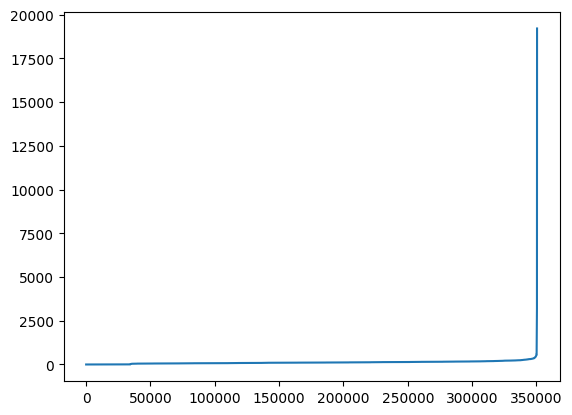

In [43]:
# plotting the price value excluding last two values in sorted data
plt.plot(var[:-2])
plt.show()

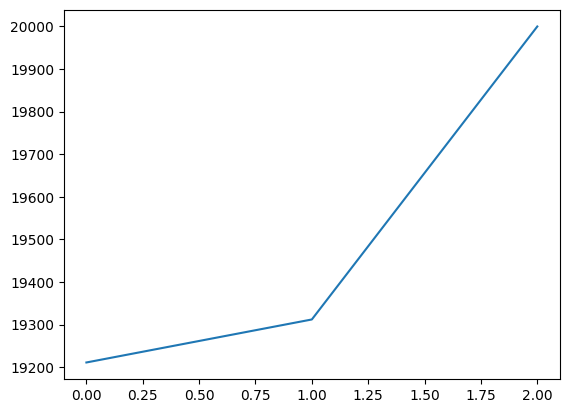

In [44]:
plt.plot(var[-3:])
plt.show()

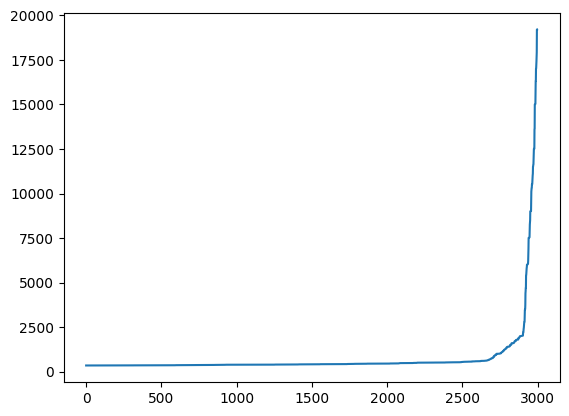

In [45]:
plt.plot(var[-3000:-2])
plt.show()

As we can see above, after the power PS value of 1500, the curve increases sharply. Furthermore, after conducting online research, I found that up to the year 2016, the highest power output in a car was 1521 PS, and the specific car with this power is the Koenigsegg Regera. You can verify this information here: https://en.m.wikipedia.org/wiki/List_of_production_cars_by_power_output

In [46]:
df=df[(df.powerPS>60) & (df.powerPS<1500)]

In [47]:
df["powerPS"].describe()

count    278789.000000
mean        135.687046
std          62.278914
min          61.000000
25%          97.000000
50%         122.000000
75%         163.000000
max        1436.000000
Name: powerPS, dtype: float64

## in kilometer column

In [48]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =df["kilometer"].values
    var = np.sort(var,axis = None)
    print(f"{i} percentile value is {var[int(len(var)*(float(i)/100))]}")
print ("100 percentile value is ",var[-1])

0 percentile value is 5000
10 percentile value is 60000
20 percentile value is 90000
30 percentile value is 125000
40 percentile value is 150000
50 percentile value is 150000
60 percentile value is 150000
70 percentile value is 150000
80 percentile value is 150000
90 percentile value is 150000
100 percentile value is  150000


In [49]:
#calculating 0-10th percentile to find a the correct percentile value for removal of outliers
#calculating price values at each percntile 0,1,2,3,4,5,6,7,8,9,10

for i in range(0, 11):  # Adjusted the range to include 10
    var = df["kilometer"].values
    var = np.sort(var, axis=None)
    index = int(len(var) * (float(i) / 100))  # Corrected the indexing formula
    print(f"{i} percentile value is {var[min(index, len(var)-1)]}")

0 percentile value is 5000
1 percentile value is 5000
2 percentile value is 20000
3 percentile value is 20000
4 percentile value is 30000
5 percentile value is 40000
6 percentile value is 40000
7 percentile value is 50000
8 percentile value is 50000
9 percentile value is 50000
10 percentile value is 60000


In the 'kilometer' column, all values appear to be within the normal range, so there is no need to remove anything

## in age column

In [50]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =df["Age"].values
    var = np.sort(var,axis = None)
    print(f"{i} percentile value is {var[int(len(var)*(float(i)/100))]}")
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 5
20 percentile value is 7
30 percentile value is 9
40 percentile value is 11
50 percentile value is 12
60 percentile value is 14
70 percentile value is 15
80 percentile value is 17
90 percentile value is 20
100 percentile value is  106


In [51]:
#calculating values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =df["Age"].values
    var = np.sort(var,axis = None)
    print(f"{i} percentile value is {var[int(len(var)*(float(i)/100))]}")
print("100 percentile value is ",var[-1])

90 percentile value is 20
91 percentile value is 20
92 percentile value is 20
93 percentile value is 21
94 percentile value is 21
95 percentile value is 22
96 percentile value is 23
97 percentile value is 25
98 percentile value is 26
99 percentile value is 31
100 percentile value is  106


In [52]:
#calculating values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["Age"].values
    var = np.sort(var,axis = None)
    print(f"{99+i} percentile value is {var[int(len(var)*(float(99+i)/100))]}")
print("100 percentile value is ",var[-1])

99.0 percentile value is 31
99.1 percentile value is 31
99.2 percentile value is 32
99.3 percentile value is 33
99.4 percentile value is 35
99.5 percentile value is 37
99.6 percentile value is 38
99.7 percentile value is 42
99.8 percentile value is 45
99.9 percentile value is 49
100 percentile value is  106


In [53]:
df=df[(df.Age>0) & (df.Age<25)]

In [54]:
df.describe()

,price,powerPS,kilometer,Age
count,265279.000000,265279.000000,265279.000000,265279.000000
mean,6743.399647,136.244237,125423.742550,12.022508
std,8424.191062,62.176192,39369.748154,5.204561
min,0.000000,61.000000,5000.000000,1.000000
25%,1750.000000,100.000000,100000.000000,8.000000
50%,4000.000000,122.000000,150000.000000,12.000000
75%,8800.000000,163.000000,150000.000000,16.000000
max,350000.000000,1436.000000,150000.000000,24.000000


## Univariate Analysis

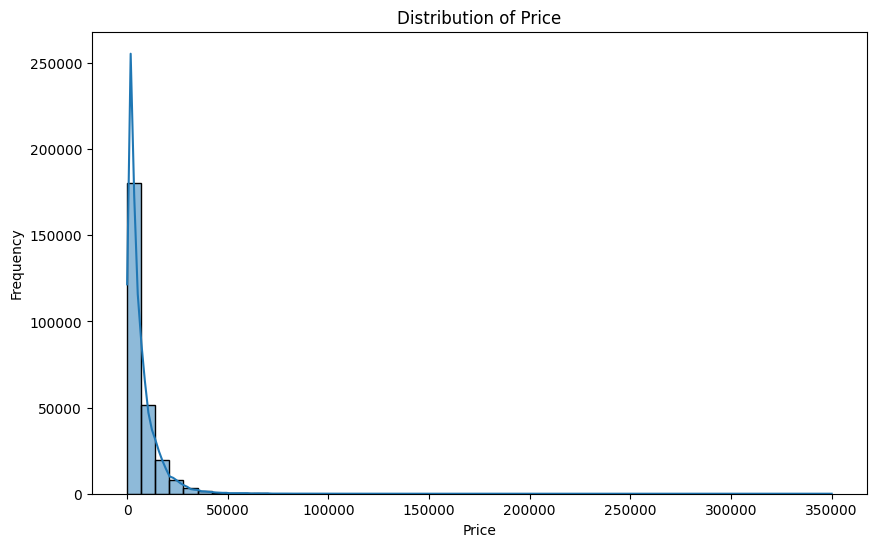

In [55]:
# Distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

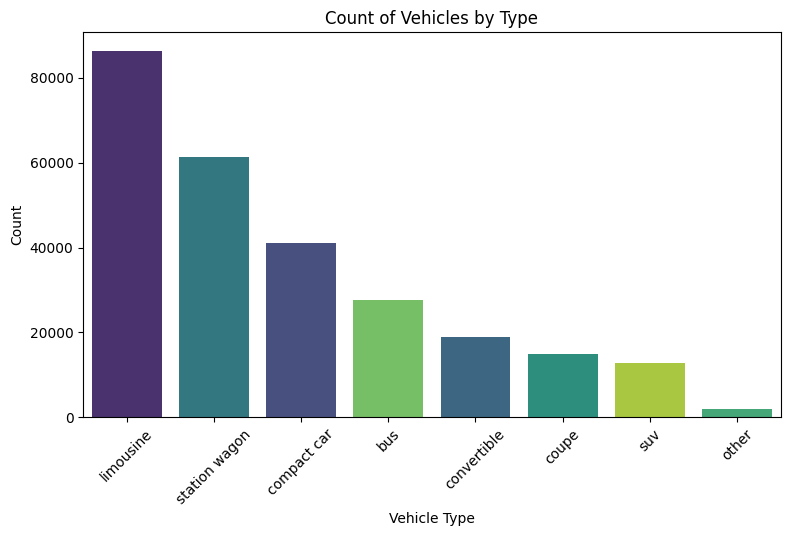

In [56]:
# Countplot for 'vehicleType' with rotated labels and a colorful palette
color_palette = sns.color_palette("viridis", len(df['vehicleType'].unique()))
plt.figure(figsize=(9, 5))
order = df['vehicleType'].value_counts().index
ax = sns.countplot(data=df, x='vehicleType', hue='vehicleType',order=order, palette=color_palette, legend=False)
plt.title('Count of Vehicles by Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

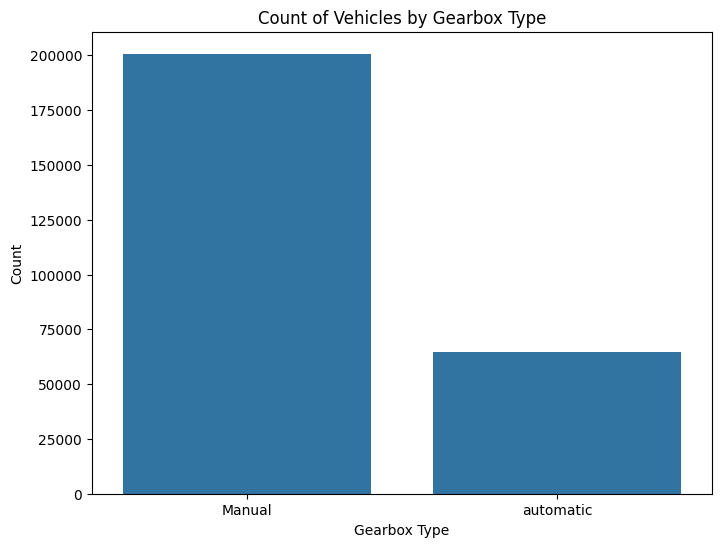

In [57]:
# Count of each category (gearbox type)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gearbox')
plt.title('Count of Vehicles by Gearbox Type')
plt.xlabel('Gearbox Type')
plt.ylabel('Count')
plt.show()

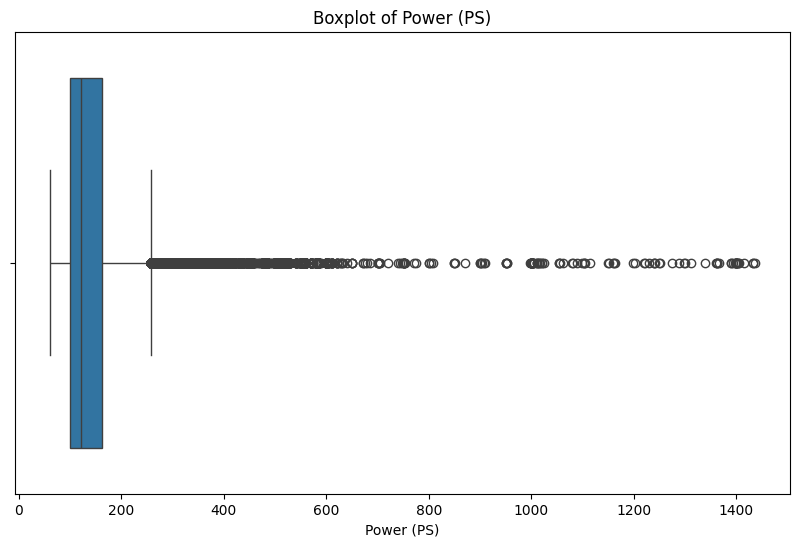

In [58]:
# Boxplot for 'powerPS'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='powerPS')
plt.title('Boxplot of Power (PS)')
plt.xlabel('Power (PS)')
plt.show()

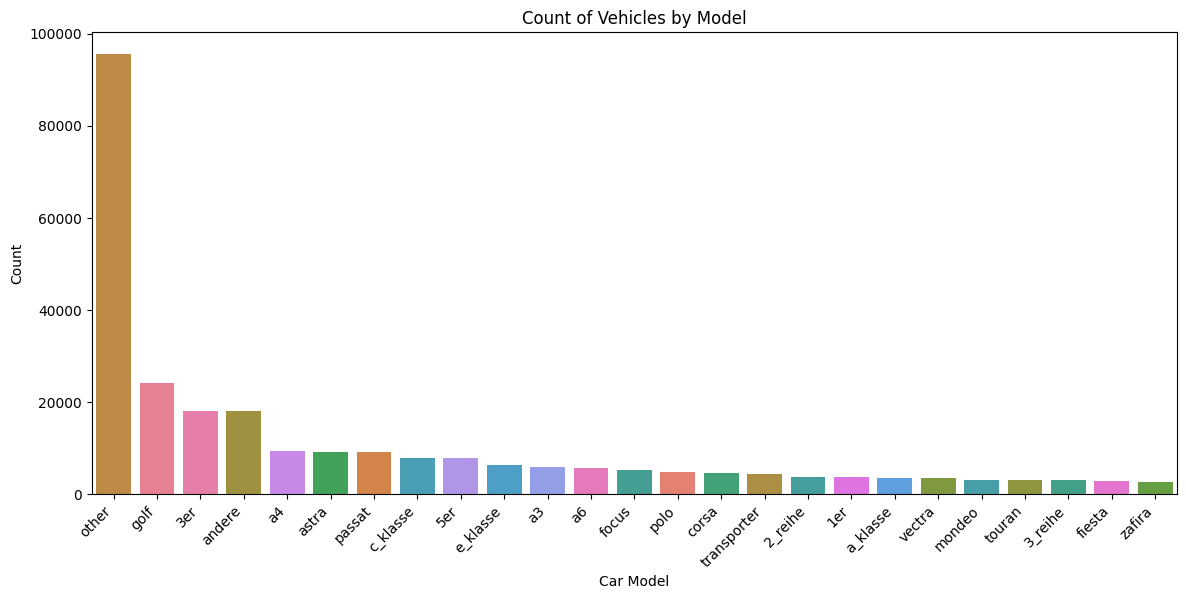

In [59]:
# Count of each category (car models) 

low_count_models = df['model'].value_counts()[df['model'].value_counts() < 2500].index

df_viz = df.copy()

df_viz['model'] = df['model'].replace(low_count_models, 'other')

custom_palette = sns.color_palette("husl", len(df_viz['model'].value_counts()))
plt.figure(figsize=(14, 6))
sns.countplot(data=df_viz, x='model', hue = "model", order=df_viz['model'].value_counts().index, palette=custom_palette,legend=False)
plt.title('Count of Vehicles by Model')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

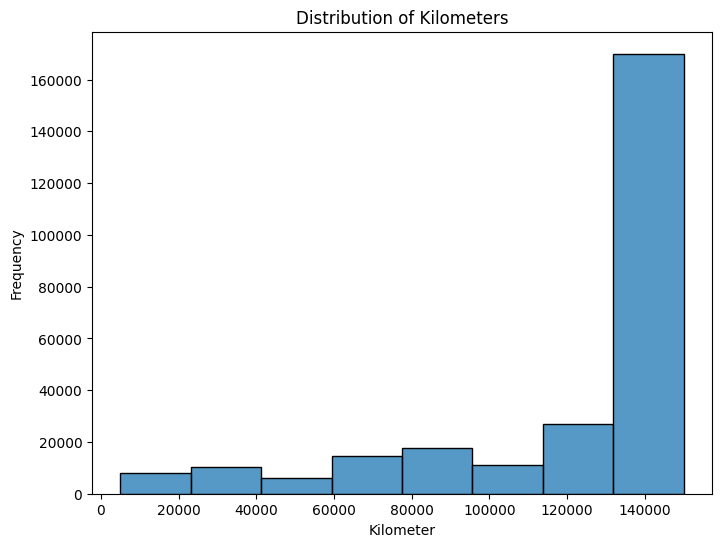

In [60]:
# Descriptive statistics for kilometer
plt.figure(figsize=(8, 6))
sns.histplot(df['kilometer'], bins=8)
plt.title('Distribution of Kilometers')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

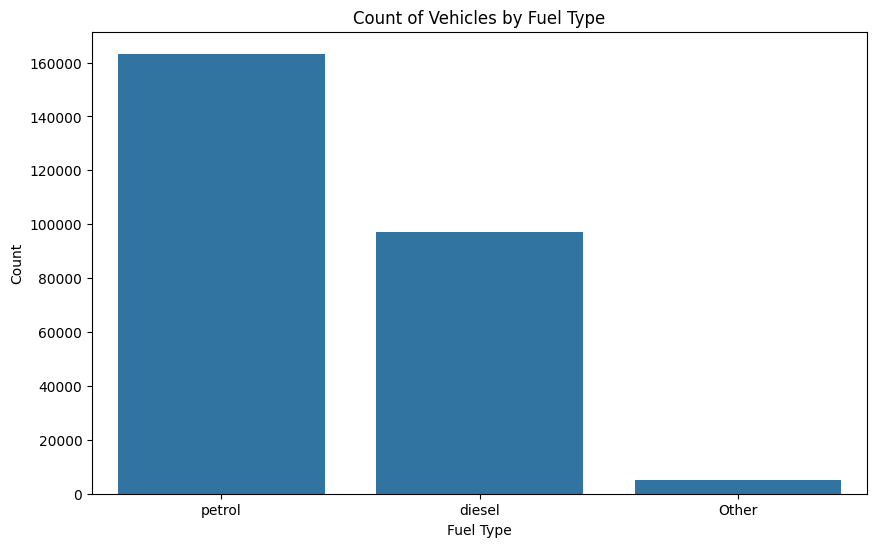

In [61]:
# Countplot for 'fuelType'
low_count_categories = df['fuelType'].value_counts()[df['fuelType'].value_counts() < 5000].index
df_visualization = df.copy()
df_visualization['fuelType'] = df_visualization['fuelType'].replace(low_count_categories, 'Other')


plt.figure(figsize=(10, 6))
sns.countplot(data=df_visualization, x='fuelType', order=df_visualization['fuelType'].value_counts().index)
plt.title('Count of Vehicles by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

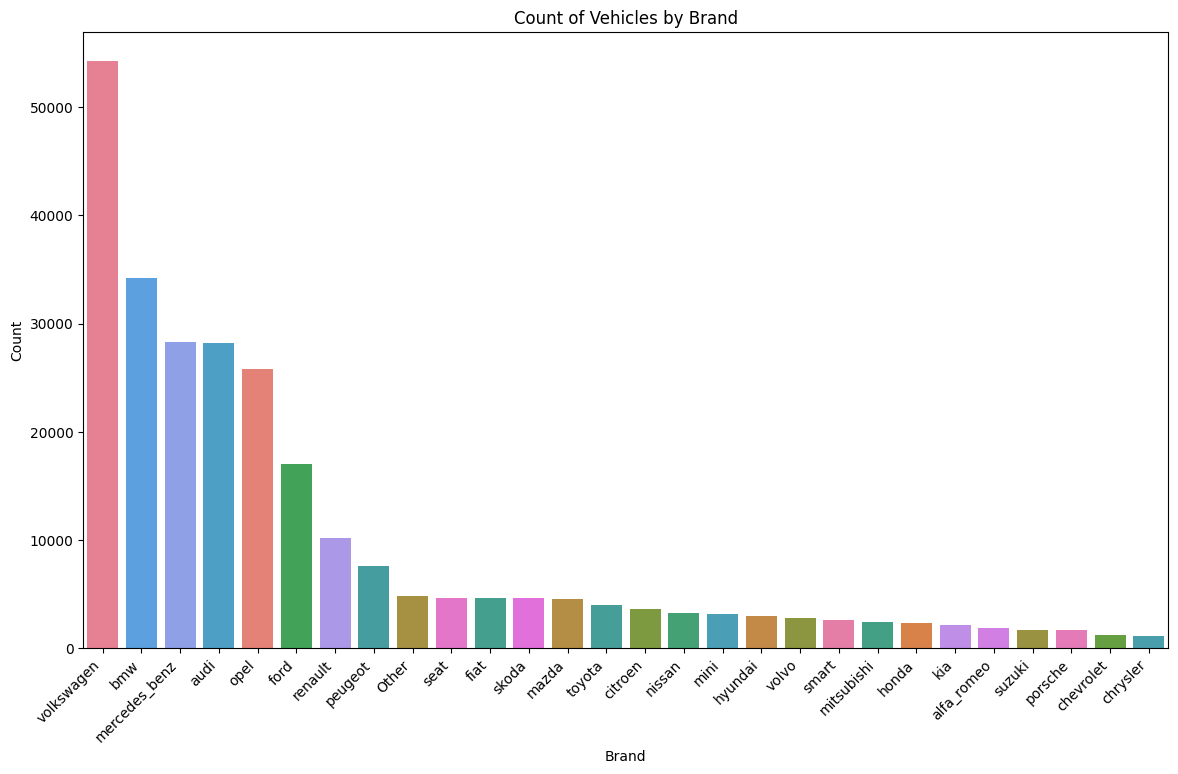

In [62]:
# Countplot for 'brand' 
low_count_brands = df['brand'].value_counts()[df['brand'].value_counts() < 1000].index

df_visualization = df.copy()

df_visualization['brand'] = df_visualization['brand'].replace(low_count_brands, 'Other')

custom_palette = sns.color_palette("husl", len(df_visualization['brand'].value_counts()))

plt.figure(figsize=(14, 8))
sns.countplot(data=df_visualization, x='brand', hue ='brand', order=df_visualization['brand'].value_counts().index, palette=custom_palette,legend=False )
plt.title('Count of Vehicles by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

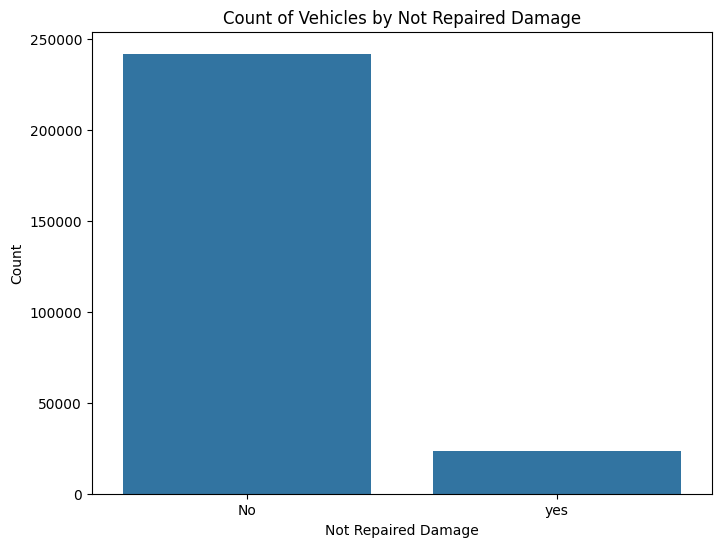

In [63]:
# Countplot for 'notRepairedDamage'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='notRepairedDamage')
plt.title('Count of Vehicles by Not Repaired Damage')
plt.xlabel('Not Repaired Damage')
plt.ylabel('Count')
plt.show()

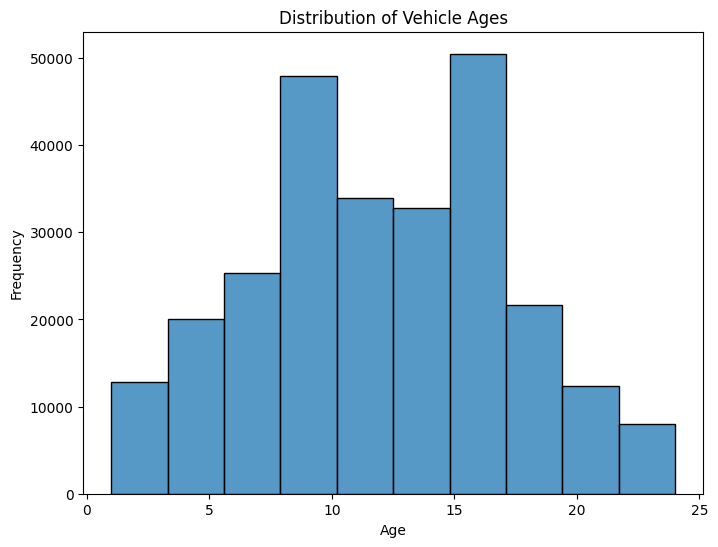

In [64]:
# Descriptive statistics for age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10)
plt.title('Distribution of Vehicle Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis

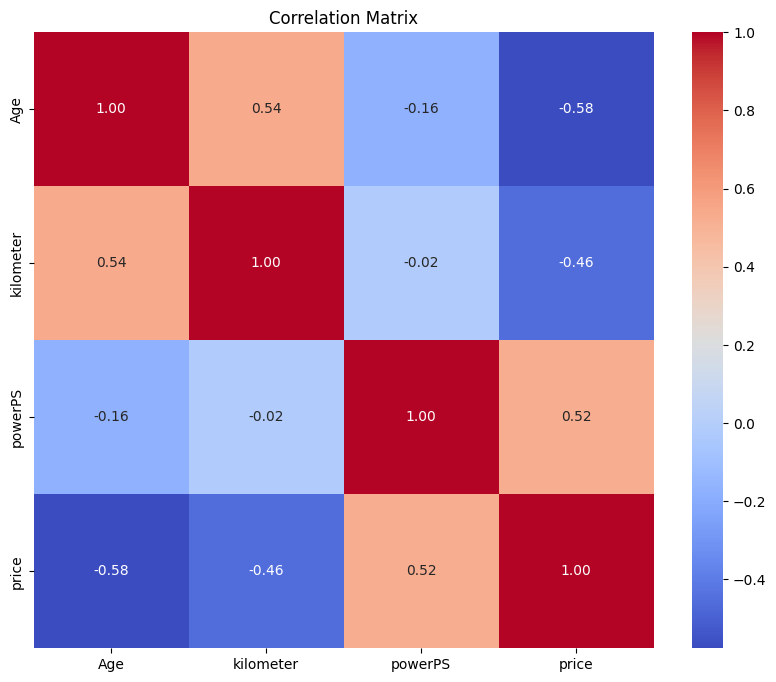

In [65]:
numeric_columns = ["Age","kilometer","powerPS","price"]

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

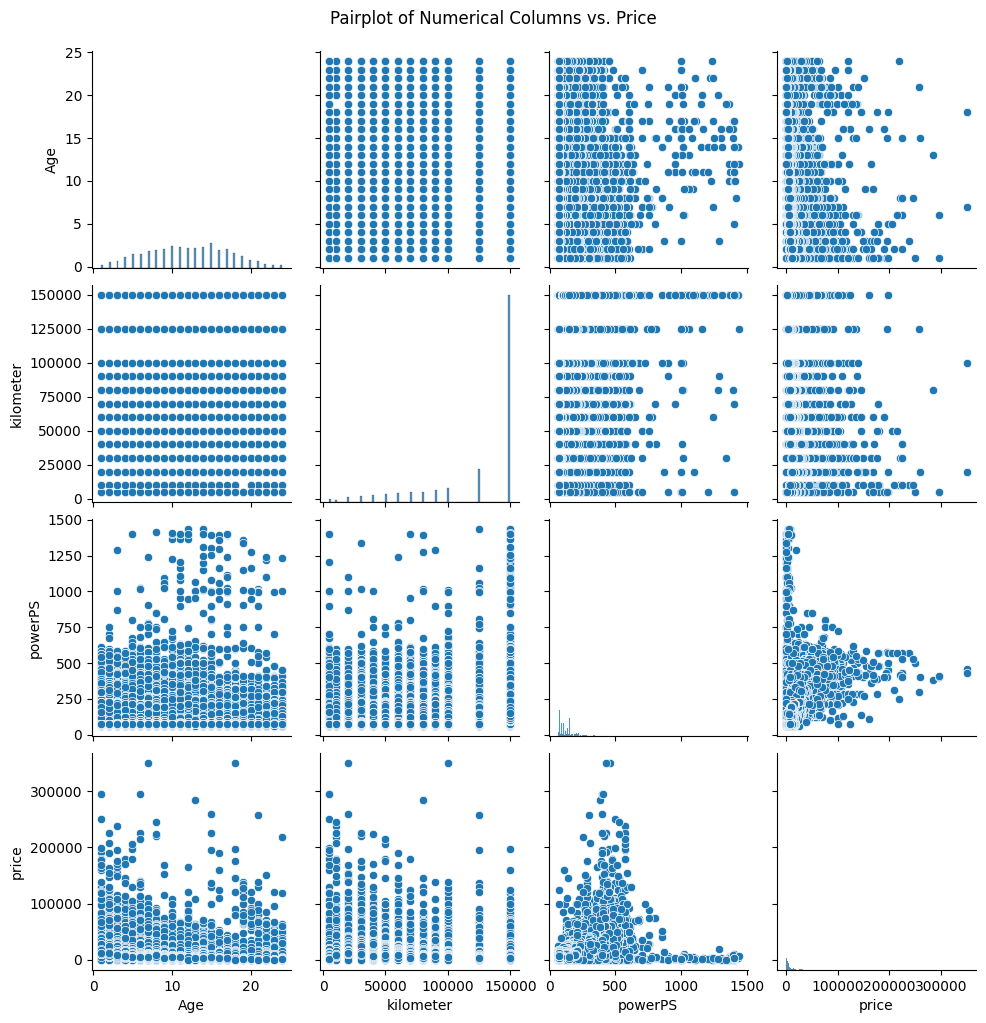

In [66]:
#pairplot

# Converting numeric columns to float (if not already)
numeric_columns = ["Age", "kilometer", "powerPS", "price"]
df[numeric_columns] = df[numeric_columns].astype(float)

sns.pairplot(df[numeric_columns])
plt.suptitle('Pairplot of Numerical Columns vs. Price', y=1.02)
plt.show()

# Data Preprocessing

## feature engineering

### For 'brand': 
#### Top 10 Brands:
Keeping only the top 10 brands based on their frequency and grouping the rest into an 'other' category.

In [67]:
top_brands = df['brand'].value_counts().nlargest(10).index
df['brand_grouped'] = df['brand'].where(df['brand'].isin(top_brands), 'other_brandsbrand_grouped')

In [68]:
df = df.drop("brand",axis=1)

### For 'model':

Replace models with their popularity scores based on the number of occurrences.

In [69]:
model_popularity = df['model'].value_counts(normalize=True).to_dict()
df['model_popularity'] = df['model'].map(model_popularity)

In [70]:
df = df.drop("model",axis=1)

### For Age 

Convert the 'Age' column into categorical bins to represent different age groups.

In [71]:
df['mileage_per_year'] = df['kilometer'] / df['Age']

In [72]:
df["Age"].describe()

count    265279.000000
mean         12.022508
std           5.204561
min           1.000000
25%           8.000000
50%          12.000000
75%          16.000000
max          24.000000
Name: Age, dtype: float64

In [73]:
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [74]:
df["vehicleType"].unique()

array(['limousine', 'compact car', 'convertible', 'station wagon',
       'coupe', 'other', 'bus', 'suv'], dtype=object)

## Data Splitting:

In [75]:
target = ["price"]
numerical = ["powerPS","kilometer","model_popularity","mileage_per_year"]
categorical = ['vehicleType','gearbox', 'fuelType', 'brand_grouped','Age','notRepairedDamage']

In [76]:
mean_price = df['price'].mean()
mean_price

6743.399647163929

In [77]:
random_state_value = 42

initial_train_val, test_set = train_test_split(df, test_size=0.2, random_state=random_state_value)
train_set, validation_set = train_test_split(initial_train_val, test_size=0.25, random_state=random_state_value)

MinMaxScaler scales the selected columns to a specified range (default is 0 to 1).

In [78]:
scaler = MinMaxScaler()

train_set[numerical] = scaler.fit_transform(train_set[numerical])

validation_set[numerical] = scaler.transform(validation_set[numerical])

test_set[numerical] = scaler.transform(test_set[numerical])

## Encoding categorical variables:

In [79]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[categorical])
mod_cat_cols = []

for column in tqdm(categorical):
    encoder_n = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[[column]])
    mod_cat_cols_n = list(encoder_n.get_feature_names_out([column]))

    train_set[mod_cat_cols_n] = encoder_n.transform(train_set[[column]])
    test_set[mod_cat_cols_n] = encoder_n.transform(test_set[[column]])
    validation_set[mod_cat_cols_n] = encoder_n.transform(validation_set[[column]])

    mod_cat_cols += mod_cat_cols_n

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 17.68it/s]


In [80]:
#features
train_x = train_set[numerical + mod_cat_cols]
test_x = test_set[numerical + mod_cat_cols]
val_x = validation_set[numerical + mod_cat_cols]

#targets
train_y = train_set[target]
test_y = test_set[target]
val_y = validation_set[target]

## Model selection

In [81]:
def apply_regression_methods(X_train, y_train, X_test, y_test):
    # Initialize models
    linear_reg = LinearRegression()
    ridge_reg = Ridge()
    lasso_reg = Lasso(max_iter=10000)
    random_forest_reg = RandomForestRegressor()
    xgboost_reg = xgb.XGBRegressor()

    models = {'Linear Regression': linear_reg,
              'Ridge Regression': ridge_reg,
              'Lasso Regression': lasso_reg,
              'Random Forest Regression': random_forest_reg,
              'XGBoost Regression': xgboost_reg}

    results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[model_name] = {'Model': model,
                               'Mean Squared Error': mse,
                               'R^2 Score': r2}

    return results

In [82]:
regression_results_val_set = apply_regression_methods(train_x, train_y, val_x, val_y)
regression_results_test_set = apply_regression_methods(train_x, train_y, test_x, test_y)

## Error in validation set

In [83]:
for model_name, result in regression_results_val_set.items():
    print(f"{model_name} Results:")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R^2 Score: {result['R^2 Score']}")
    print("\n")

Linear Regression Results:
Mean Squared Error: 25774259.711229645
R^2 Score: 0.6291850553548453


Ridge Regression Results:
Mean Squared Error: 25756668.5433544
R^2 Score: 0.6294381399444702


Lasso Regression Results:
Mean Squared Error: 25749584.643749747
R^2 Score: 0.629540056192277


Random Forest Regression Results:
Mean Squared Error: 11131247.977078632
R^2 Score: 0.8398544459201858


XGBoost Regression Results:
Mean Squared Error: 9895494.092865458
R^2 Score: 0.8576332691843083




## Error in test set

In [84]:
for model_name, result in regression_results_test_set.items():
    print(f"{model_name} Results:")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R^2 Score: {result['R^2 Score']}")
    print("\n")

Linear Regression Results:
Mean Squared Error: 27149831.83949035
R^2 Score: 0.6192798858350743


Ridge Regression Results:
Mean Squared Error: 27127905.616409577
R^2 Score: 0.6195873556641276


Lasso Regression Results:
Mean Squared Error: 27134049.918586932
R^2 Score: 0.6195011945622741


Random Forest Regression Results:
Mean Squared Error: 9622923.714706091
R^2 Score: 0.8650584417272749


XGBoost Regression Results:
Mean Squared Error: 9515601.738730587
R^2 Score: 0.8665634099785466




#### Given the robust performance of the random forest model, let's proceed with it.

In [85]:
model = RandomForestRegressor()
model.fit(train_x, train_y)

RandomForestRegressor()

In [86]:
#Verifying the model accuracy with the latest unseen data, which is available on eBay.
#check this data on ebay: https://www.ebay.co.uk/itm/256432251038?itmmeta=01HR69PQQ4ZA3TDB40KMCP7CJ4&hash=item3bb48da09e:g:yP4AAOSwN-dl44s1

#'price','vehicleType', 'gearbox', 'powerPS', 'kilometer', 'fuelType','notRepairedDamage', 'Age', 'brand_grouped', 'model_popularity','mileage_per_year'
car_desc = [4500, "station wagon", "manual", 150, 177241, "diesel", "No", "6-10", "volkswagen", 0.034164, 17724.1]

pred_inst = pd.DataFrame(columns=df.columns)
pred_inst.loc[0] = car_desc

pred_inst[numerical] = scaler.fit_transform(pred_inst[numerical])
pred_inst[mod_cat_cols] = encoder.transform(pred_inst[categorical])
pred_x = pred_inst[numerical + mod_cat_cols]
pred_y = pred_inst[target]

prediction = model.predict(pred_x)

# Convert to scalars before formatting
actual_price = pred_y.values[0][0] if isinstance(pred_y.values[0], np.ndarray) else pred_y.values[0]
predicted_price = prediction[0][0] if isinstance(prediction[0], np.ndarray) else prediction[0]

# Print the values
print(f"listing price={actual_price:.2f}  /  predicted price={predicted_price:.2f}")

listing price=4500.00  /  predicted price=4302.45


The prediction is very close to the price, the prediction error is 4.39%.